In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reddit = pd.read_csv(r'..\extracted_data\reddit.csv')
youtube = pd.read_csv(r'..\extracted_data\YoutubeCommentsDataSet.csv')

In [3]:
reddit.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
youtube.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [5]:
reddit.rename(columns={'clean_comment': 'comment'}, inplace=True)
youtube.rename(columns={'Comment': 'comment',
                        'Sentiment': 'category'}, inplace=True)

In [6]:
youtube['category'] = youtube['category'].map({'negative': -1, 'neutral': 0, 'positive': 1})

In [7]:
comments = pd.concat([reddit, youtube], ignore_index=True)
comments.head()

,comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
comments.shape

(55657, 2)

In [9]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55657 entries, 0 to 55656
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   55513 non-null  object
 1   category  55657 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 869.8+ KB


In [10]:
comments.isnull().sum()

comment     144
category      0
dtype: int64

In [11]:
comments[comments['comment'].isna()]

,comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
48750,NaN,1
48752,NaN,0
49090,NaN,1
53610,NaN,1


In [12]:
comments.dropna(inplace=True)

In [13]:
comments.duplicated().sum()

np.int64(861)

In [14]:
comments[comments.duplicated()]

,comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
55394,explore our free courses with completion certi...,0
55532,thanks for this video very neatly calmly expla...,1
55547,explore our free courses with completion certi...,0
55557,do you want to learn technology from me check ...,0


In [15]:
comments.drop_duplicates(inplace=True)

In [16]:
comments[(comments['comment'].str.strip() == '')]

,comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [17]:
comments = comments[~(comments['comment'].str.strip() == '')]

In [18]:
comments['comment'] = comments['comment'].str.lower()
comments.head()

,comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [19]:
comments[comments['comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
55499,wow congratulations for starting such an amazi...,1
55527,omg such awesome day to day life examples give...,1
55592,amazing explanation i loved the way you taught,1
55598,idk if you realise the intensity of positive i...,1


In [20]:
comments['comment'] = comments['comment'].str.strip()

In [21]:
comments[comments['comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,comment,category


In [22]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments[comments['comment'].str.contains(url_pattern, regex=True)]

,comment,category


In [23]:
comments['comment'] = comments['comment'].str.replace(url_pattern, ' ', regex=True)

In [24]:
comments[comments['comment'].str.contains(url_pattern, regex=True)]

,comment,category


In [25]:
comments[comments['comment'].str.contains('\n')]

,comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [26]:
comments['comment'] = comments['comment'].str.replace('\n', ' ', regex=True)

In [27]:
comments[comments['comment'].str.contains('\n')]

,comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

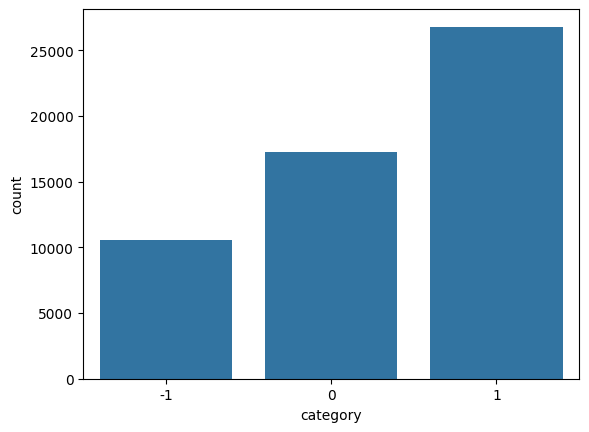

In [28]:
sns.countplot(data=comments, x="category")

In [29]:
comments['word_count'] = comments['comment'].apply(lambda x: len(x.split()))
comments.head()

,comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


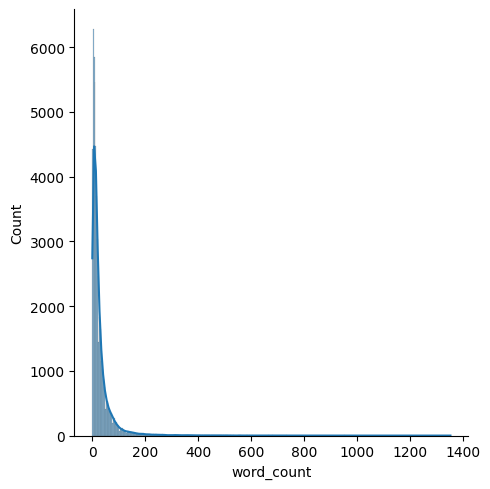

In [30]:
sns.displot(comments['word_count'], kde=True)

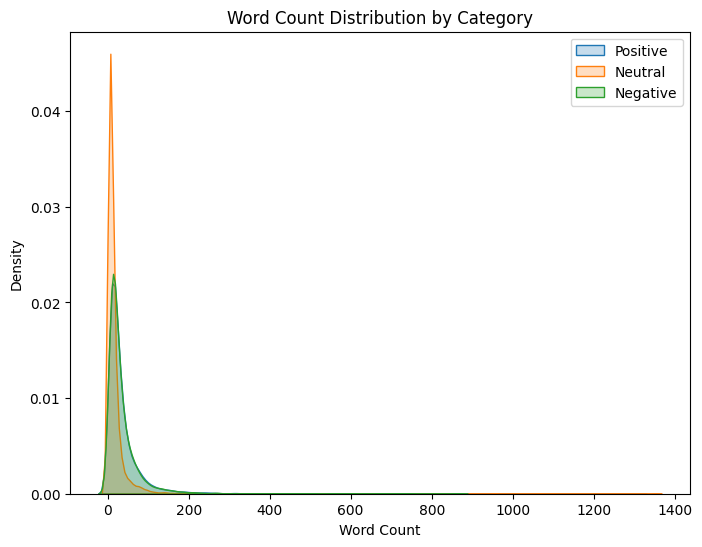

In [31]:
# Create the figure and axes
plt.figure(figsize=(8, 6))

# Plot KDE for category 1
sns.kdeplot(comments[comments['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(comments[comments['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(comments[comments['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

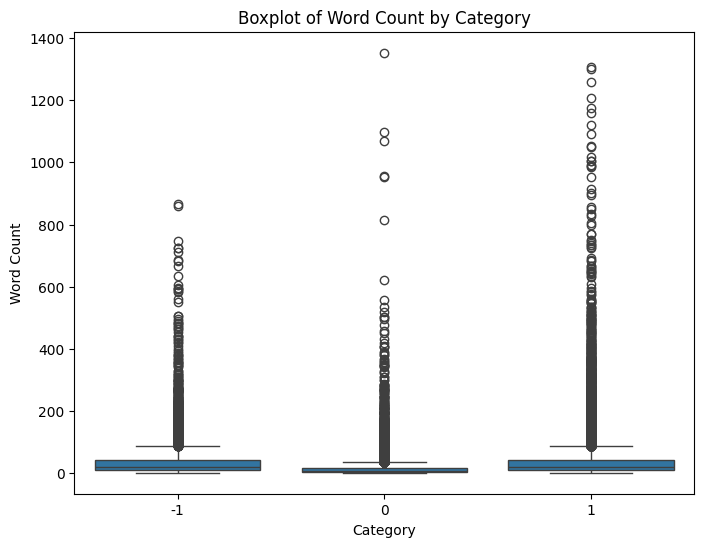

In [32]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(8, 6))
sns.boxplot(data=comments, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

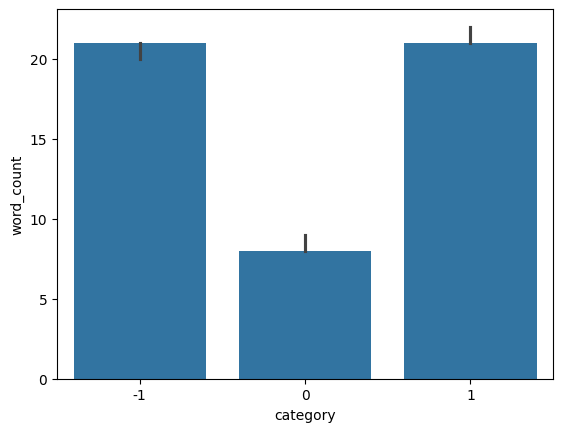

In [33]:
sns.barplot(comments,x='category',y='word_count',estimator='median')

In [34]:
from nltk.corpus import stopwords

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
comments['num_stop_words'] = comments['comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

C:\Users\mo\AppData\Local\Temp\ipykernel_2648\2241958622.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


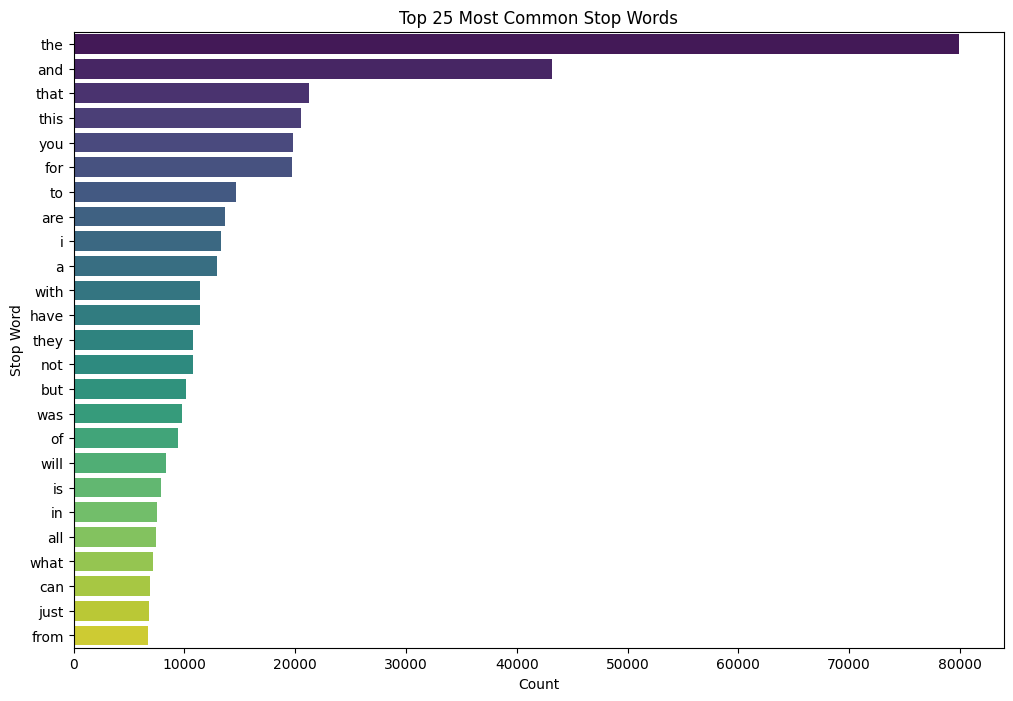

In [35]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in comments['comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


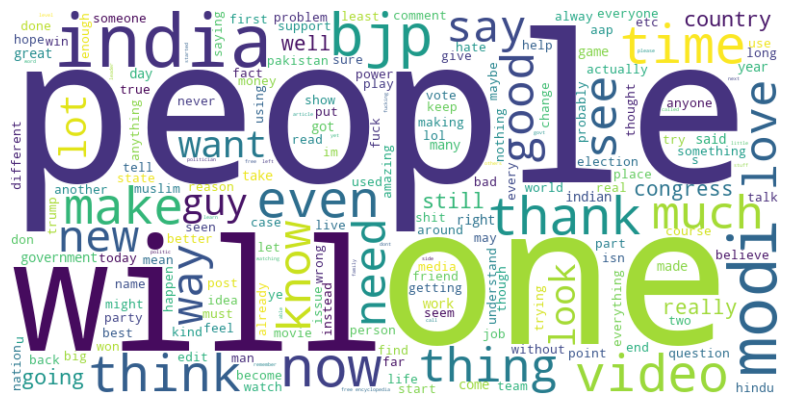

In [36]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(comments['comment'])

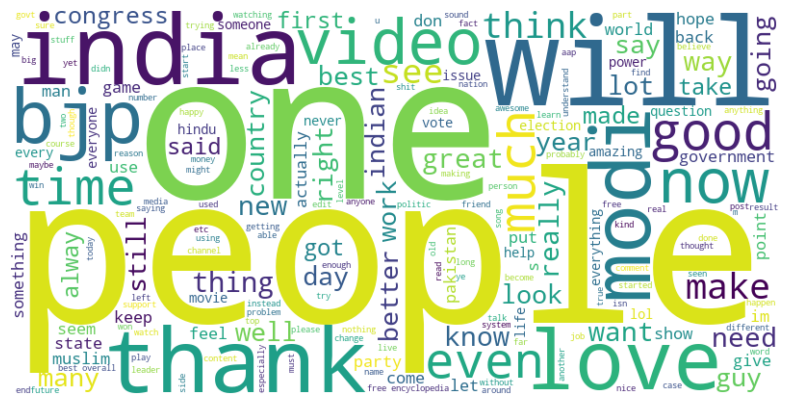

In [37]:
plot_word_cloud(comments[comments['category'] == 1]['comment'])

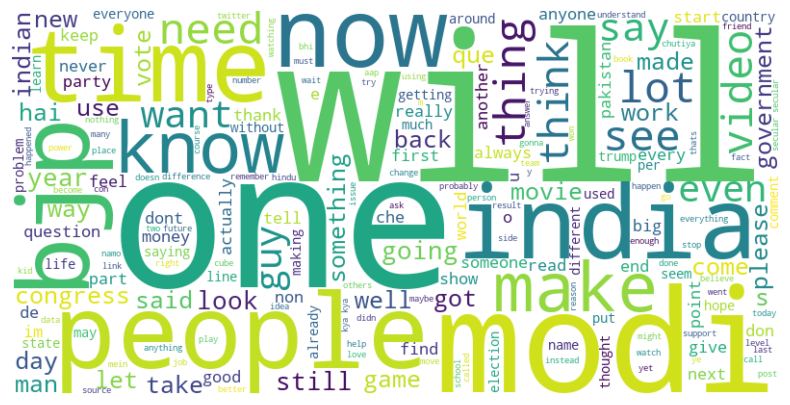

In [38]:
plot_word_cloud(comments[comments['category'] == 0]['comment'])

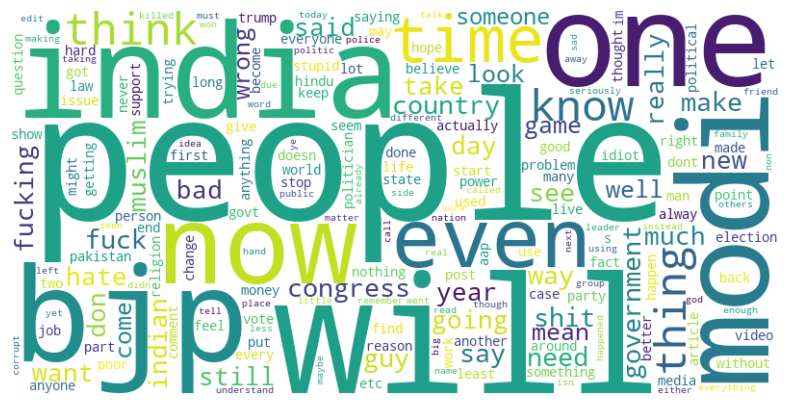

In [39]:
plot_word_cloud(comments[comments['category'] == -1]['comment'])

In [40]:
comments.head()

,comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45
